In [251]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [61]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:  # relative_path should be an r-string
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [18]:
ref = pickle_load(r'Data\Dataset\reflectance.pkl')
elev = pickle_load(r'Data\Dataset\elevation.pkl')
temp = pickle_load(r'Data\Dataset\temp.pkl')

In [19]:
ref_pca_train = pickle_load(r'Data\Dataset\Splits\reflectance_train_pca244.pkl')
elev_train = pickle_load(r'Data\Dataset\Splits\elevation_train.pkl')
temp_train = pickle_load(r'Data\Dataset\Splits\temp_train.pkl')

In [20]:
ref_pca_val = pickle_load(r'Data\Dataset\Splits\reflectance_val_pca244.pkl')
elev_val = pickle_load(r'Data\Dataset\Splits\elevation_val.pkl')
temp_val = pickle_load(r'Data\Dataset\Splits\temp_val.pkl')

In [21]:
ref_pca_test = pickle_load(r'Data\Dataset\Splits\reflectance_test_pca244.pkl')
elev_test = pickle_load(r'Data\Dataset\Splits\elevation_test.pkl')
temp_test = pickle_load(r'Data\Dataset\Splits\temp_test.pkl')

In [52]:
wavelengths = pickle.load(open(r'C:\Users\danny\Downloads\emit_wavelengths.pkl', 'rb'))
len(wavelengths)

244

In [ ]:
all_wavelengths = np.concatenate(
    [
        wavelengths[:127],
        (
            wavelengths[126] +
            np.arange(1, 16) * (wavelengths[127]-wavelengths[126])/16
        ),
        wavelengths[127:172],
        (
            wavelengths[171] +
            np.arange(1, 27) * (wavelengths[172]-wavelengths[171])/27
        ),
        wavelengths[172:]
    ]
)

pickle_save(all_wavelengths, r'Data\Raw_Data\all_emit_wavelengths.pkl')

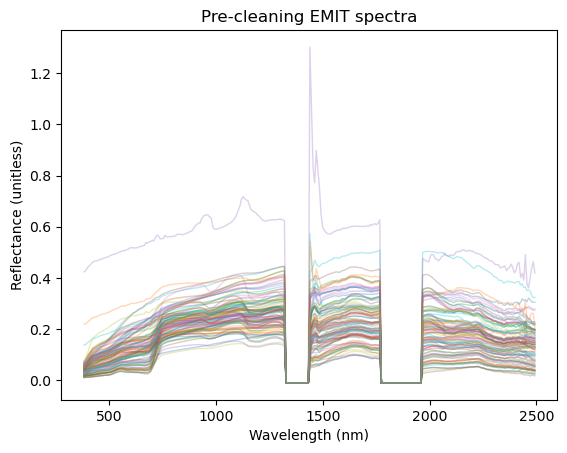

In [322]:
e3 = xr.load_dataset(join_path(r'Data\Raw_Data\EMIT_L2A_RFL_001_20230728T214118_2320914_003.nc'))

e3v = e3['reflectance'].values
e3v = e3v.reshape((e3v.shape[0] * e3v.shape[1], e3v.shape[2]))

fig, ax = plt.subplots()
plt.plot(all_wavelengths, np.random.default_rng().choice(e3v, 100, axis=0).T, linewidth=1, alpha=0.3)
ax.set_title('Pre-cleaning EMIT spectra')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance (unitless)')
plt.show(fig)

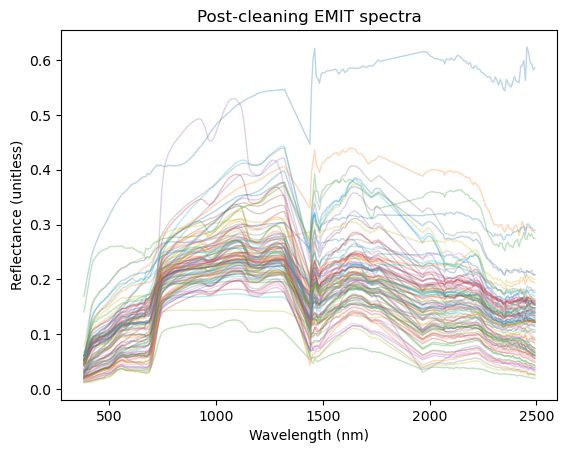

In [324]:
n = 2
fig, ax = plt.subplots()
plt.plot(np.arange(1, n+1), np.random.default_rng().choice(ref_pca.reshape(ref.shape[0] * ref.shape[1], ref.shape[2]), 100, axis=0).T, linewidth=1, alpha=0.3)
ax.set_title(f'Post-PCA EMIT spectra, N={n}')
ax.set_xlabel('Component Number')
ax.set_ylabel('Value')
plt.show(fig)

In [326]:
stats = (
    pd.read_csv(
        join_path(r'Miscellaneous\linear_benchmarking_pca.csv')
    ).set_index('Unnamed: 0', drop=True).rename_axis(None)
)

In [327]:
stats

radius  n_components  train_avg_std  train_std_std  train_std_min  \
0        0             0       0.757287       1.234179   2.533197e-07   
1        0             1       0.727892       1.168169   7.599592e-07   
0        0             2       0.876936       1.505531   4.708767e-06   
1        0             3       0.652148       0.937898   4.172325e-07   
2        0             4       0.807985       1.253334   5.960464e-07   
..     ...           ...            ...            ...            ...   
1       10             4       0.577383       0.813557   6.437302e-06   
2       10             8       0.575604       0.787684   2.909452e-06   
0       11             2       0.576075       0.798737   1.356006e-06   
1       11             4       0.578755       0.816821   2.920628e-06   
2       11             6       0.574302       0.787386   1.192093e-06   

    train_std_0.5pct  train_std_2.5pct  train_std_16pct  train_std_25pct  \
0           0.004121          0.020587         0.132303         0.208238   
1           0.003935          0.020335         0.131752         0.206400   
0           0.004797          0.023988         0.150872         0.237068   
1           0.003513          0.018434         0.119394         0.188364   
2           0.004647          0.022724         0.143723         0.225042   
..               ...               ...              ...              ...   
1           0.003447          0.016580         0.106967         0.168408   
2           0.003470          0.017033         0.109488         0.172685   
0           0.003293          0.016589         0.106835         0.168438   
1           0.003375          0.016333         0.106247         0.167823   
2           0.003262          0.016974         0.109903         0.173120   

    train_std_50pct  ...  val_K_0.5pct  val_K_2.5pct  val_K_16pct  \
0          0.436360  ...      0.033621      0.164079     1.005111   
1          0.429068  ...      0.021063      0.103389     0.678437   
0          0.493667  ...      0.016506      0.081942     0.531535   
1          0.397615  ...      0.014538      0.071044     0.462349   
2          0.467673  ...      0.015328      0.080050     0.512874   
..              ...  ...           ...           ...          ...   
1          0.355675  ...      0.008482      0.042358     0.277631   
2          0.362908  ...      0.009227      0.045147     0.292010   
0          0.356839  ...      0.010450      0.052101     0.327810   
1          0.356339  ...      0.010323      0.050043     0.316656   
2          0.364346  ...      0.009928      0.049170     0.317688   

    val_K_25pct  val_K_50pct  val_K_75pct  val_K_84pct  val_K_97.5pct  \
0      1.481314     2.652771     3.863681     4.430933       6.225194   
1      1.057231     2.118229     3.332510     3.847561       5.567916   
0      0.835222     1.745429     2.797175     3.268398       4.941283   
1      0.724855     1.511253     2.468866     2.927829       4.755900   
2      0.808052     1.697480     2.691770     3.144813       4.879239   
..          ...          ...          ...          ...            ...   
1      0.434202     0.912342     1.555356     1.919442       3.624039   
2      0.455928     0.943284     1.580973     1.949097       3.468740   
0      0.517790     1.062125     1.732046     2.078494       3.496691   
1      0.499942     1.031573     1.766926     2.184307       3.777269   
2      0.500952     1.045714     1.804757     2.236268       3.688322   

    val_K_99.5pct  val_K_max  
0        7.451458  13.808208  
1        6.872256  12.439514  
0        6.336752  13.695402  
1        6.503888  14.574112  
2        6.585458  14.794523  
..            ...        ...  
1        5.184704  14.730185  
2        5.238914  14.112472  
0        5.324077  11.228178  
1        5.452928  13.397440  
2        5.020776  12.777856  

[74 rows x 54 columns]

In [328]:
new_stats = (
    pd.read_csv(
        join_path(r'Miscellaneous\linear_benchmarking_pca_temp.csv')
    ).set_index('Unnamed: 0', drop=True).rename_axis(None)
)

In [329]:
new_stats

radius  n_components  train_avg_std  train_std_std  train_std_min  \
0       12             2       0.573853       0.815833   6.556511e-07   
1       12             3       0.573001       0.803381   4.962087e-06   
2       12             4       0.570818       0.815274   1.013279e-06   
3       12             5       0.578839       0.822741   1.192093e-06   
4       12             6       0.574020       0.800433   4.172325e-07   
5       14             1       0.705631       1.143958   9.626150e-06   
6       14             2       0.569245       0.805892   4.172325e-06   
7       14             3       0.579998       0.805144   1.996756e-06   
8       14             4       0.578356       0.823842   2.056360e-06   
9       14             5       0.585226       0.830453   2.831221e-07   
10      16             1       0.701038       1.126007   3.099442e-06   
11      16             2       0.575365       0.806296   5.215406e-08   
12      16             3       0.586974       0.815559   6.705523e-08   
13      16             4       0.586369       0.833166   5.960464e-07   
14      16             5       0.592303       0.841795   3.576279e-07   
15      18             1       0.700759       1.120630   5.066395e-07   
16      18             2       0.579218       0.801118   2.801418e-06   
17      18             3       0.594935       0.828022   1.788139e-06   
18      18             4       0.600147       0.871180   1.245737e-05   
19      18             5       0.609201       0.905527   3.069639e-06   
20      20             1       0.708911       1.138027   7.972121e-07   
21      20             2       0.588659       0.833152   9.238720e-07   
22      20             3       0.607254       0.908223   3.039837e-06   
23      20             4       0.618710       1.009065   3.725290e-07   
24      20             5       0.619534       0.989812   8.314848e-06   
25      22             1       0.708967       1.140091   4.410744e-06   
26      22             2       0.604634       0.979369   1.847744e-06   
27      22             3       0.630246       1.032686   1.206994e-06   
28      22             4       0.633293       1.038252   9.238720e-06   
29      22             5       0.662774       1.267651   3.278255e-07   
30      24             1       0.702079       1.115618   3.412366e-06   
31      24             2       0.613702       1.015716   3.576279e-07   
32      24             3       0.644205       1.142818   7.152557e-06   
33      24             4       0.659756       1.290911   3.576279e-07   
34      24             5       0.697657       1.477095   8.374453e-06   
35      32             1       0.730502       1.470801   5.140901e-06   
36      32             2       0.686444       1.502652   2.086163e-07   
37      32             3       0.755987       1.774890   3.755093e-06   
38      32             4       0.839753       2.168176   2.205372e-06   
39      32             5       0.797758       2.085811   5.900860e-06   

    train_std_0.5pct  train_std_2.5pct  train_std_16pct  train_std_25pct  \
0           0.003363          0.016210         0.103911         0.164021   
1           0.003175          0.015894         0.102658         0.162733   
2           0.003211          0.016153         0.103966         0.163051   
3           0.003426          0.016614         0.105704         0.165673   
4           0.003292          0.016374         0.106615         0.168715   
5           0.003933          0.020111         0.129220         0.202828   
6           0.003231          0.015949         0.103939         0.163564   
7           0.003230          0.016251         0.104455         0.164555   
8           0.003317          0.016587         0.105552         0.166486   
9           0.003217          0.016165         0.106033         0.167035   
10          0.004090          0.020050         0.128465         0.201635   
11          0.003337          0.016350         0.104458         0.165291   
12          0.003404  

In [330]:
stats_combined = pd.concat([stats, new_stats], axis=0)

In [331]:
stats_combined[['radius', 'n_components', 'train_avg_std', 'val_avg_std']]

radius  n_components  train_avg_std  val_avg_std
0        0             0       0.757287     1.203041
1        0             1       0.727892     1.027860
0        0             2       0.876936     0.882043
1        0             3       0.652148     0.810168
2        0             4       0.807985     0.862994
..     ...           ...            ...          ...
35      32             1       0.730502     1.486253
36      32             2       0.686444     0.649258
37      32             3       0.755987     0.637518
38      32             4       0.839753     0.704605
39      32             5       0.797758     0.680667

[114 rows x 4 columns]

In [282]:
stats_combined.to_csv(join_path(r'Miscellaneous\linear_benchmarking_pca.csv'))

In [284]:
plotting_stats = stats_combined[stats_combined['radius'] == 11]
plotting_stats

radius  n_components  train_avg_std  train_std_std  train_std_min  \
0      11             2       0.576075       0.798737       0.000001   
1      11             4       0.578755       0.816821       0.000003   
2      11             6       0.574302       0.787386       0.000001   

   train_std_0.5pct  train_std_2.5pct  train_std_16pct  train_std_25pct  \
0          0.003293          0.016589         0.106835         0.168438   
1          0.003375          0.016333         0.106247         0.167823   
2          0.003262          0.016974         0.109903         0.173120   

   train_std_50pct  ...  val_K_0.5pct  val_K_2.5pct  val_K_16pct  val_K_25pct  \
0         0.356839  ...      0.010450      0.052101     0.327810     0.517790   
1         0.356339  ...      0.010323      0.050043     0.316656     0.499942   
2         0.364346  ...      0.009928      0.049170     0.317688     0.500952   

   val_K_50pct  val_K_75pct  val_K_84pct  val_K_97.5pct  val_K_99.5pct  \
0     1.062125     1.732046     2.078494       3.496691       5.324077   
1     1.031573     1.766926     2.184307       3.777269       5.452928   
2     1.045714     1.804757     2.236268       3.688322       5.020776   

   val_K_max  
0  11.228178  
1  13.397440  
2  12.777856  

[3 rows x 54 columns]

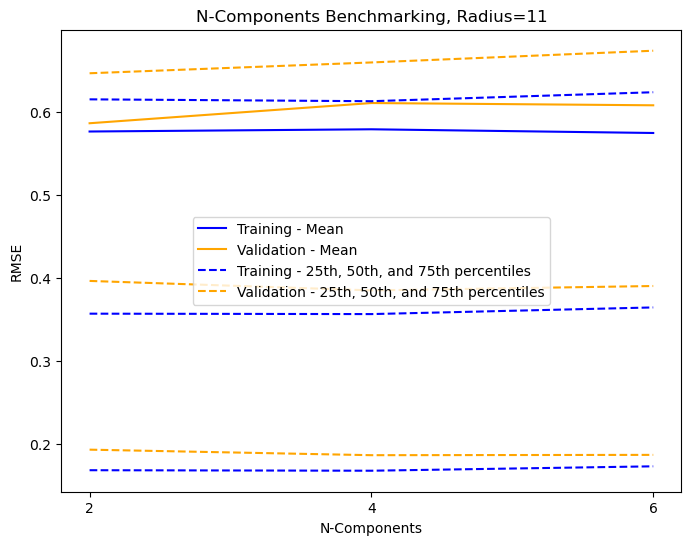

In [285]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('N-Components Benchmarking, Radius=11')
ax.plot(
    np.arange(len(plotting_stats)),
    plotting_stats['train_avg_std'],
    label='Training - Mean',
    color='blue'
)
ax.plot(
    np.arange(len(plotting_stats)),
    plotting_stats['val_avg_std'],
    label='Validation - Mean',
    c='orange'
)
ax.plot(
    np.arange(len(plotting_stats)),
    plotting_stats['train_std_50pct'],
    label='Training - 25th, 50th, and 75th percentiles',
    linestyle='--',
    c='blue',
)
ax.plot(
    np.arange(len(plotting_stats)),
    plotting_stats['val_std_50pct'],
    label='Validation - 25th, 50th, and 75th percentiles',
    linestyle='--',
    c='orange',
)
# ax.plot(
#     np.arange(len(plotting_stats)),
#     plotting_stats['train_std_84pct'],
#     linestyle='--',
#     c='blue',
# )
# ax.plot(
#     np.arange(len(plotting_stats)),
#     plotting_stats['val_std_84pct'],
#     linestyle='--',
#     c='orange',
# )
# ax.plot(
#     np.arange(len(plotting_stats)),
#     plotting_stats['train_std_97.5pct'],
#     linestyle='--',
#     c='blue',
# )
# ax.plot(
#     np.arange(len(plotting_stats)),
#     plotting_stats['val_std_97.5pct'],
#     linestyle='--',
#     c='orange',
# )
# ax.plot(
#     np.arange(len(plotting_stats)),
#     plotting_stats['train_std_2.5pct'],
#     linestyle='--',
#     c='blue',
# )
# ax.plot(
#     np.arange(len(plotting_stats)),
#     plotting_stats['val_std_2.5pct'],
#     linestyle='--',
#     c='orange',
# )
ax.plot(
    np.arange(len(plotting_stats)),
    plotting_stats['train_std_25pct'],
    linestyle='--',
    c='blue',
)
ax.plot(
    np.arange(len(plotting_stats)),
    plotting_stats['val_std_25pct'],
    linestyle='--',
    c='orange',
)
ax.plot(
    np.arange(len(plotting_stats)),
    plotting_stats['train_std_75pct'],
    linestyle='--',
    c='blue',
)
ax.plot(
    np.arange(len(plotting_stats)),
    plotting_stats['val_std_75pct'],
    linestyle='--',
    c='orange',
)
ax.set_xticks(np.arange(len(plotting_stats)))
ax.set_xticklabels(plotting_stats['n_components'])
ax.set_xlabel('N-Components')
ax.set_ylabel('RMSE')
ax.legend()
plt.show(fig)